In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('data/agg_data.csv')
df

,company,position,location,schedule,responsibilities,requirements,levels,techstack,source,date_publish,format,salary,currency
0,Сбербанк,Аналитик данных,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['sql', 'python', 'oracle', 'субд', 'greenplum...",superjob.ru,2022-12-25 10:50:27,Не имеет значения,Договорная,RUB
1,Friendwork,Data Engineer (remote),Москва,Полный рабочий день,не определено,не определено,От 3 лет,"['sql', 'python', 'postgresql', 'spark', 'dock...",superjob.ru,2022-12-19 00:00:00,Удалённая работа (на дому),Договорная,RUB
2,Технопарк «Сколково»,Teamlead проекта,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 11:01:29,Не имеет значения,Договорная,RUB
3,Технопарк «Сколково»,Frontend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:58:50,Не имеет значения,Договорная,RUB
4,Технопарк «Сколково»,Backend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:54:29,Не имеет значения,Договорная,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,не определено,не определено,не определено,[],Задачи ставить вопросы и отвечать на них с пом...,"Ожидаем опыт работы с python (pandas, scipy), ...",['Middle'],"['python', 'tableau']",https://t.me/s/datasciencejobs,2020-02-13 11:01:00,['Офис'],250000.0,RUB
5986,"российская IT-компания, специализирующаяся на ...",не определено,Москва,['Гибкий'],• Опыт проработки задачи от бизнес-постановки...,• Опыт использования ml библиотек на Python (...,"['Senior', 'Lead']","['python', 'hive', 'airflow', 'docker']",https://t.me/s/datasciencejobs,2020-02-14 11:28:00,['Офис'],600000.0,RUB
5987,не определено,не определено,не определено,[],не определено,• Высшее образование;\n• Опыт работы руковод...,[],"['java', 'c++', 'oracle']",https://t.me/s/datasciencejobs,2020-02-19 12:16:00,[],400000.0,RUB
5988,не определено,Data Scientist,не определено,['Fulltime'],не определено,"• 3 years of experience in business analysis, ...",[],['pandas'],https://t.me/s/datasciencejobs,2020-02-20 23:04:00,['Удалёнка'],3000.0,USD


In [3]:
# Location - число вакансии за весь период. Выявление центра притяжений датасайентистов

In [4]:
df1 = df.copy()
df1 = df1[(df1['location'] != 'не определено') & (df1['location'] != 'Not indicated')]
df1_task1 = df1['location'].value_counts().nlargest(n=15)

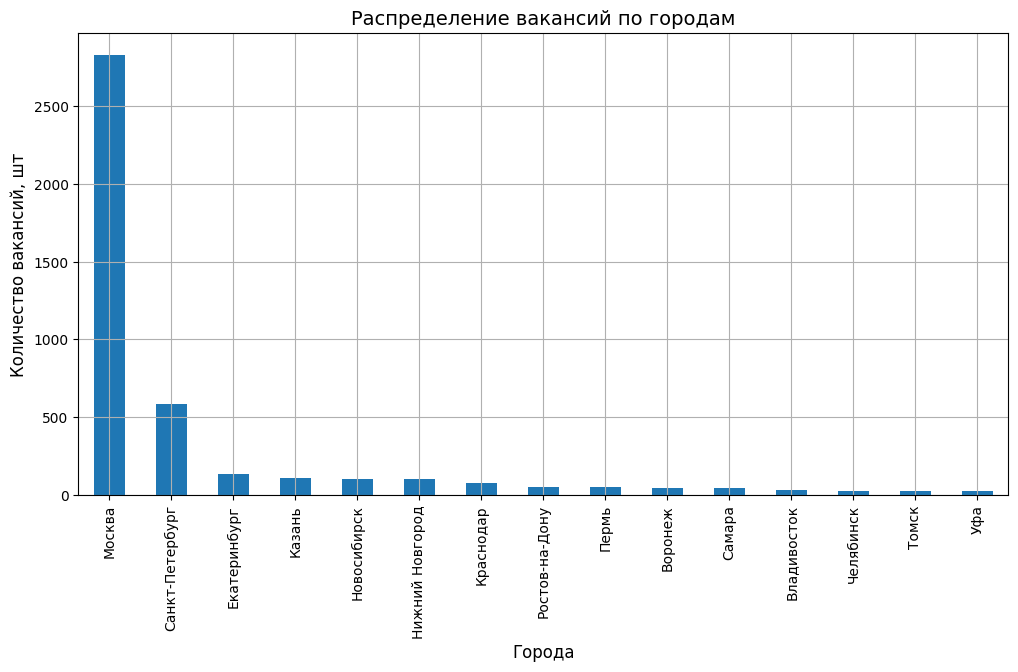

In [5]:
fig = plt.figure(figsize=(12,6))
df1_task1.plot(kind='bar')
plt.title("Распределение вакансий по городам", fontsize=14)
plt.xlabel("Города", fontsize=12)
plt.ylabel("Количество вакансий, шт", fontsize=12)
plt.grid()

Вывод:
Как можно судить из графика зависимости количества вакансий от города, то наибольшее количество вакансий представлено в городе Москве и Санкт-Петербурге, более 500 вакансий. В то время, как в остальных городах количество вакансий менее 250.

In [7]:
df2 = df.copy()
df2 = df2[(df2['salary'] != 'не определено') & (df2['salary'] != 'Договорная')]
df2 = df2[(df2['salary'] != 'False') & (df2['salary'] != 'True')]
df2['salary'] = df2['salary'].astype(np.float16)
df2['salary'] = df2['salary'].replace(np.inf, 0.0)
df2 = df2[df2['salary'] > 0]

c:\SKG\Programming\venv\ml_venv\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


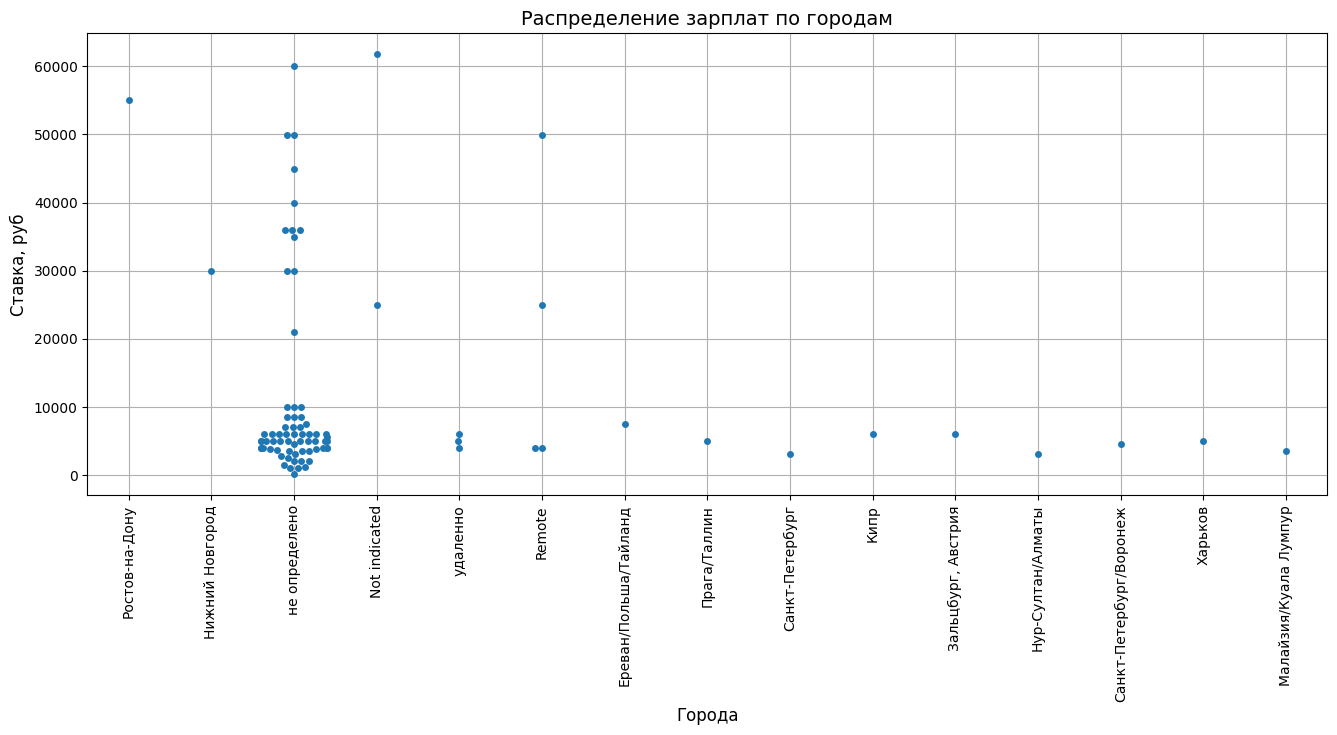

In [8]:
figure = plt.figure(figsize=(16,6))
sns.swarmplot(data=df2, x='location', y='salary')
plt.xticks(rotation=90);
plt.title("Распределение зарплат по городам", fontsize=14)
plt.xlabel("Города", fontsize=12)
plt.ylabel("Ставка, руб", fontsize=12)
plt.grid()


Вывод:

In [10]:
def convert_to_rub(df):
    if df['currency'] == 'USD':
        df['salary'] = 70 * float(df['salary'])
        

In [63]:
df3 = df.copy()
format_list = ['Полная занятость', 'удаленка', 'Стажировка', 'Частичная занятость', 'Проектная работа', 'Не имеет значения']

In [65]:
df3['format'] = df3['format'].replace({'удаленка':'Удалёнка'})
mask = (df3['format'] == 'Полная занятость') | (df3['format'] == 'Удалёнка') | (df3['format'] == 'Стажировка') | (df3['format'] == 'Частичная занятость') | (df3['format'] == 'Проектная работа')
df3 = df3[mask]
df3['format'].value_counts()

Полная занятость       4270
Удалёнка                669
Стажировка               57
Частичная занятость      41
Проектная работа         17
Name: format, dtype: int64

In [67]:
task3 = df3.groupby('location', as_index=False)['format'].value_counts().sort_values(by='count', ascending=False).nlargest(20, columns='count')

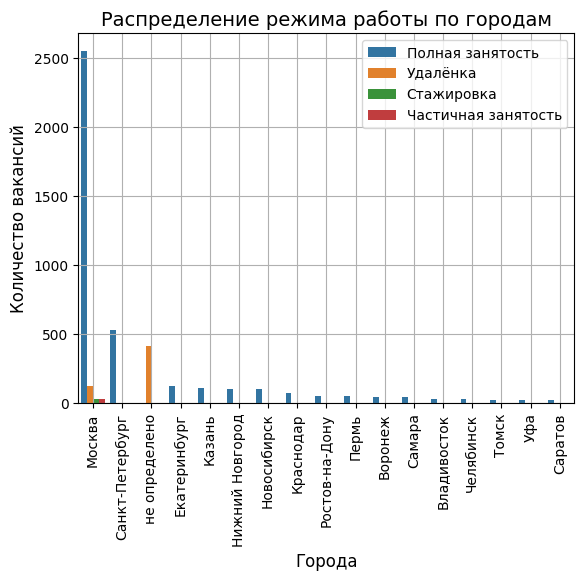

In [68]:
sns.barplot(data=task3, x='location', hue='format', y='count')
plt.xticks(rotation=90);
plt.title("Распределение режима работы по городам", fontsize=14)
plt.xlabel("Города", fontsize=12)
plt.ylabel("Количество вакансий", fontsize=12)
plt.legend(loc='upper right')
plt.grid()

Вывод:как видно из графика все четыре варианта работы присутствуют только в Москве. В основном, компании предпочитают чтобы сотрудники работали на полную ставку в офисе. По данным, только в Москве обнаружены вакансии с возможностью удалённой работы.

In [83]:
df4 = df.copy()
schedule_lst = ['Полный день', 'Удаленная работа']
df4['schedule'] = df4['schedule'].replace({'полный':'Полный день'})
mask = (df4['schedule'] == 'Полный день') | (df4['schedule'] == 'Удаленная работа') | (df4['schedule'] == 'Гибкий график')
df4 = df4[mask]
task4_2 = df4.groupby('location', as_index=False)['schedule'].value_counts().sort_values(by='count', ascending=False).nlargest(n=20, columns='count')

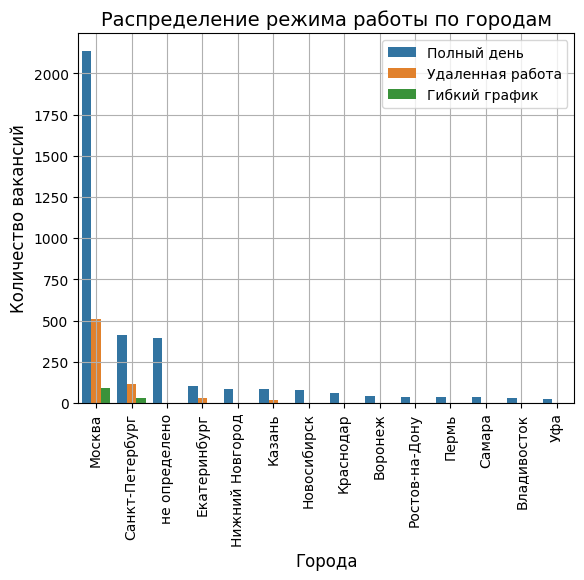

In [84]:
sns.barplot(data=task4_2, x='location', hue='schedule', y='count')
plt.xticks(rotation=90);
plt.title("Распределение режима работы по городам", fontsize=14)
plt.xlabel("Города", fontsize=12)
plt.ylabel("Количество вакансий", fontsize=12)
plt.legend(loc='upper right')
plt.grid()

Вывод:как видно из графика все три варианта работы присутствуют только в Москве. В основном, компании предпочитают чтобы сотрудники работали на полную ставку в офисе, но можно найти удалённую работу в таких городах, как Москва, Санкт-Петербург, Екатеринбург, Казань.